# Example Forecast Data

Inspect example [contrail forecast data source](https://drive.google.com/file/d/1nhB3AGVsJhOAICAUppO_EpMJrJlget-j/view).

<a target="_blank" href="https://colab.research.google.com/github/contrailcirrus/contrail-forecast/blob/main/docs/notebooks/forecast-data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Download data

In [1]:
# download example data file
!wget "https://drive.usercontent.google.com/download?id=1FODPPFbTMQ2addAk2OgieYHBw92BD6dq&export=download" -O forecast.nc

--2024-10-07 17:23:51--  https://drive.usercontent.google.com/download?id=1FODPPFbTMQ2addAk2OgieYHBw92BD6dq&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.35.161
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.35.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66478078 (63M) [application/octet-stream]
Saving to: ‘forecast.nc’

forecast.nc         100%[===================>]  63.40M  15.3MB/s    in 4.4s    

2024-10-07 17:24:00 (14.4 MB/s) - ‘forecast.nc’ saved [66478078/66478078]



## Load in xarray

In [2]:
import xarray as xr

In [3]:
ds = xr.load_dataset("forecast.nc")
ds

<xarray.Dataset>
Dimensions:       (longitude: 1440, latitude: 641, flight_level: 18, time: 1)
Coordinates:
  * longitude     (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude      (latitude) float32 -80.0 -79.75 -79.5 ... 79.5 79.75 80.0
  * flight_level  (flight_level) int32 270 280 290 300 310 ... 410 420 430 440
  * time          (time) datetime64[ns] 2024-09-25T18:00:00
Data variables:
    contrails     (longitude, latitude, flight_level, time) float32 0.0 ... 0.0
Attributes:
    forecast_reference_time:  2024-09-25T12:00:00Z
    aircraft_class:           default
    model_version:            0.32.2

## Plot continous data

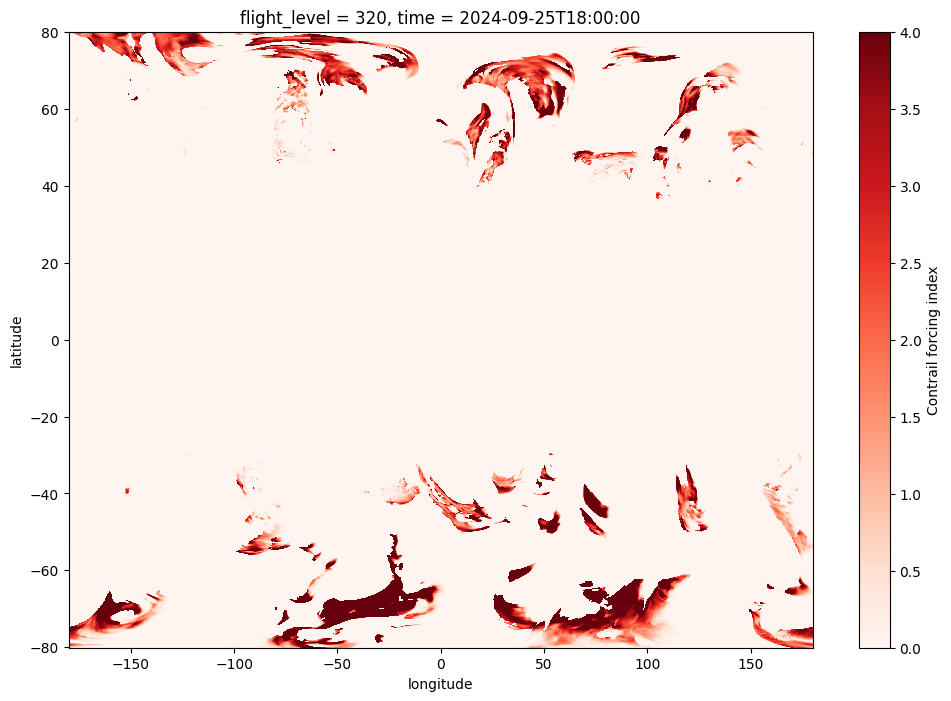

In [4]:
# Plot continuous data at Flight Level 320 for the first timestep
ds["contrails"] \
    .isel(time=0) \
    .sel(flight_level=320) \
    .plot(x="longitude", y="latitude", cmap="Reds", figsize=(12, 8));

## Interpret as polygons

Generate polygons for each contrail forcing index

In [5]:
from pycontrails.core import polygon  # pip install pycontrails

import numpy as np
from matplotlib import pyplot as plt

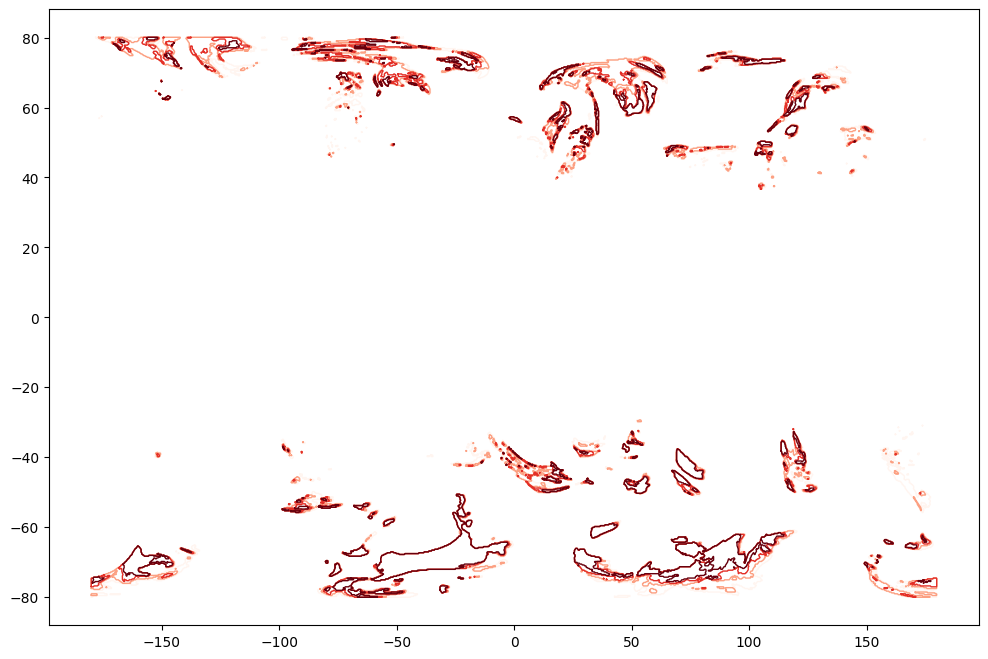

In [6]:
# Create 2D dataarray from one time and flight level
da = ds["contrails"].isel(time=0).sel(flight_level=320)

# Thresholds of interest
thresholds = [1, 2, 3, 4]

# Polygon options
longitude = da["longitude"].to_numpy()
latitude = da["latitude"].to_numpy()
min_area = 0
epsilon = 0

# Set up figure
fig, ax = plt.subplots(figsize=(12,8))
cmap = plt.get_cmap('Reds')
colors = cmap(np.linspace(0, 1, len(thresholds)))

for (c, th) in zip(colors, thresholds):

    # calculate polygons for threshold
    multipolygon = polygon.find_multipolygon(
        da.values.copy(),
        threshold=th,
        min_area=min_area,
        epsilon=epsilon,
        longitude=longitude,
        latitude=latitude,
    )

    # plot all polygons
    for poly in multipolygon.geoms:
        ax.plot(*poly.exterior.xy, color=c, lw=1)